# Package Import

In [ ]:
import numpy as np
import seaborn as sns

Raw Data

In [ ]:
str='''2.5 2.4
0.5 0.7
2.2 2.9
1.9 2.2
3.1 3.0
2.3 2.7
2 1.6
1 1.1
1.5 1.6
1.1 0.9'''

In [ ]:
k=str.split("\n")

# Clusterd Data

In [ ]:
t=[]
for x in k:
  p=x.split(" ")
  p[0]=float(p[0])
  p[1]=float(p[1])
  t.append(p)
t

[[2.5, 2.4],
 [0.5, 0.7],
 [2.2, 2.9],
 [1.9, 2.2],
 [3.1, 3.0],
 [2.3, 2.7],
 [2.0, 1.6],
 [1.0, 1.1],
 [1.5, 1.6],
 [1.1, 0.9]]

# **WorkFlow Starts**

In [ ]:
x=[]
y=[]
for i in t:
  x.append(i[0])
  y.append(i[1])

In [ ]:
x

[2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2.0, 1.0, 1.5, 1.1]

In [ ]:
y

[2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9]

In [ ]:
x=np.array(x)
y=np.array(y)

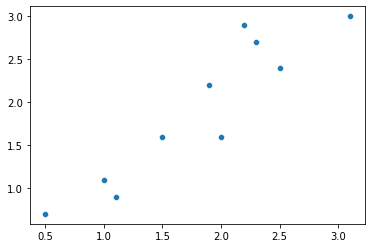

In [ ]:
sns.scatterplot(x=x,y=y)

In [ ]:
t=x.mean()
p=y.mean()

In [ ]:
c=0
for i,j in zip(x,y):
  i=i-t
  j=j-p
  x[c]=i
  y[c]=j
  c+=1

In [ ]:
x

array([ 0.69, -1.31,  0.39,  0.09,  1.29,  0.49,  0.19, -0.81, -0.31,
       -0.71])

In [ ]:
y

array([ 0.49, -1.21,  0.99,  0.29,  1.09,  0.79, -0.31, -0.81, -0.31,
       -1.01])

# *Data Visualisation*

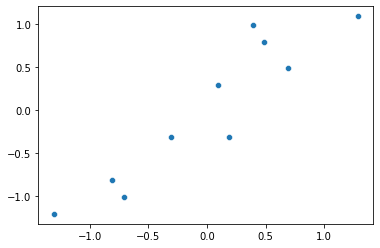

In [ ]:
sns.scatterplot(x=x,y=y)

# Numpy Covarince Matrix Correct

In [ ]:
data = np.array([x,y])
data

array([[ 0.69, -1.31,  0.39,  0.09,  1.29,  0.49,  0.19, -0.81, -0.31,
        -0.71],
       [ 0.49, -1.21,  0.99,  0.29,  1.09,  0.79, -0.31, -0.81, -0.31,
        -1.01]])

In [ ]:
covMatrix = np.cov(data,bias=False)
print (covMatrix)

[[0.61655556 0.61544444]
 [0.61544444 0.71655556]]


Types of Covarince Matrix -


*   **To get the population covariance matrix (based on N), you’ll need to set the bias to True in the code below.**

* **To get the sample covariance (based on N-1), you’ll need to set the bias to False in the code below.**





In [ ]:
covMatrix = np.cov(data,bias=True)
print (covMatrix)

[[0.5549 0.5539]
 [0.5539 0.6449]]


# Kartik Sir's **Function** (MLT)

In [ ]:
data.T.shape

(10, 2)

In [ ]:
data.T

array([[ 0.69,  0.49],
       [-1.31, -1.21],
       [ 0.39,  0.99],
       [ 0.09,  0.29],
       [ 1.29,  1.09],
       [ 0.49,  0.79],
       [ 0.19, -0.31],
       [-0.81, -0.81],
       [-0.31, -0.31],
       [-0.71, -1.01]])

In [ ]:
def covariance(X):
    return X.T @ X / X.shape[0]
    
C = covariance(data.T)
C

array([[0.5549, 0.5539],
       [0.5539, 0.6449]])

# **Trying Method 3** (Success) [MLF]

In [ ]:
data.T[0].reshape(2,1)

array([[0.69],
       [0.49]])

In [ ]:
data.T[0].reshape(2,1).shape

(2, 1)

In [ ]:
data.T[0].reshape(1,2)

array([[0.69, 0.49]])

In [ ]:
data.T[0].reshape(1,2).shape

(1, 2)

In [ ]:
data.T[0].reshape(2,1) @ data.T[0].reshape(1,2)

array([[0.4761, 0.3381],
       [0.3381, 0.2401]])

In [ ]:
len(data.T)

10

In [ ]:
sum=np.zeros((2,2))
sum

array([[0., 0.],
       [0., 0.]])

In [ ]:
for i in range(0,10):
  prod=data.T[i].reshape(2,1) @ data.T[i].reshape(1,2)
  # Sum
  sum+=prod
print(sum)

[[5.549 5.539]
 [5.539 6.449]]


In [ ]:
cov_iit=np.zeros((2,2))

In [ ]:
k=1/10
for i in range(len(sum)):
  for j in range(len(sum[i])):
    cov_iit[i][j]=sum[i][j]*k


Output of invdividual matrix multiplication and summation ⛪

In [ ]:
cov_iit

array([[0.5549, 0.5539],
       [0.5539, 0.6449]])

# `Going Ahead with -`   **PCA**

# Going Ahead with covMatrix(following example) as a Covarince Matrix

In [ ]:
e_val , e_vec = np.linalg.eigh(covMatrix)

In [ ]:
e_val

array([0.04417506, 1.15562494])

In [ ]:
e_vec

array([[-0.73517866,  0.6778734 ],
       [ 0.6778734 ,  0.73517866]])

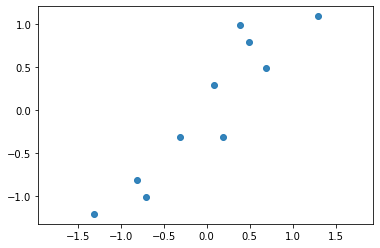

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(data.T[:, 0], data.T[:, 1], alpha=0.9)
plt.axis('equal');

In [ ]:
data.mean(axis=0)

array([ 0.59, -1.26,  0.69,  0.19,  1.19,  0.64, -0.06, -0.81, -0.31,
       -0.86])

In [ ]:
data.T.mean(axis=0)

array([-4.44089210e-17, -1.11022302e-16])

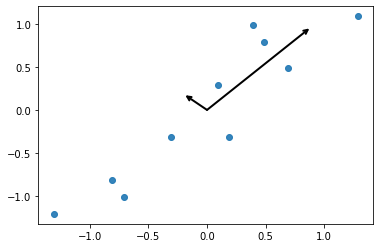

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(data.T[:, 0], data.T[:, 1], alpha=0.9)
# i=0
for length, vector in zip(e_val, e_vec):
    # i+=1
    v = vector * 1.2 * np.sqrt(length)
    draw_vector(data.T.mean(axis=0), data.T.mean(axis=0) + v)
# v = e_vec[1] * 1.2 * np.sqrt(e_val[1])
# print(v)
# draw_vector(data.T.mean(axis=0), data.T.mean(axis=0) + v)
# plt.axis('equal');
# print(i)

In [ ]:
vec_new = np.linalg.inv(np.array(e_vec)).dot(data)

In [ ]:
vec_new

array([[-0.17511531,  0.14285723,  0.38437499,  0.13041721, -0.20949846,
         0.17528244, -0.3498247 ,  0.04641726,  0.01776463, -0.16267529],
       [ 0.82797019, -1.77758033,  0.99219749,  0.27421042,  1.67580142,
         0.9129491 , -0.09910944, -1.14457216, -0.43804614, -1.22382056]])

In [ ]:
data

array([[ 0.69, -1.31,  0.39,  0.09,  1.29,  0.49,  0.19, -0.81, -0.31,
        -0.71],
       [ 0.49, -1.21,  0.99,  0.29,  1.09,  0.79, -0.31, -0.81, -0.31,
        -1.01]])

In [ ]:
temp=vec_new.reshape(10,2)

In [ ]:
temp

array([[-0.17511531,  0.14285723],
       [ 0.38437499,  0.13041721],
       [-0.20949846,  0.17528244],
       [-0.3498247 ,  0.04641726],
       [ 0.01776463, -0.16267529],
       [ 0.82797019, -1.77758033],
       [ 0.99219749,  0.27421042],
       [ 1.67580142,  0.9129491 ],
       [-0.09910944, -1.14457216],
       [-0.43804614, -1.22382056]])

In [ ]:
x_t=[]
y_t=[]
for i in temp:
  x_t.append(i[0])
  y_t.append(i[1])

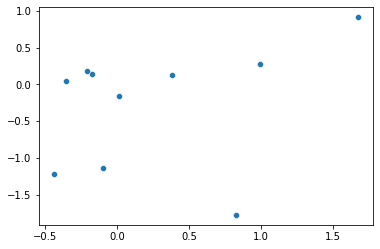

In [ ]:
sns.scatterplot(x=x_t,y=y_t)